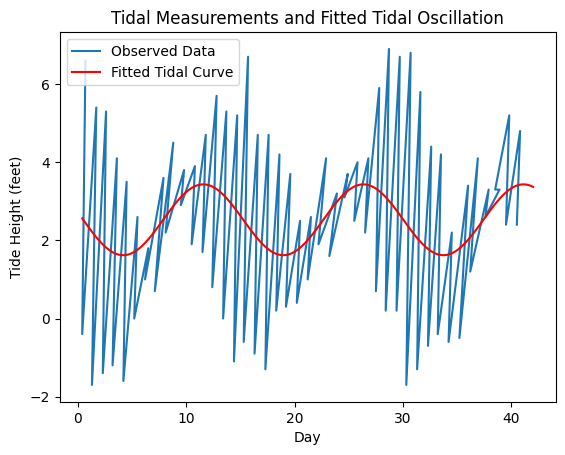

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


file_path = 'ASTR19_S22_group_project_data.txt'
data = np.loadtxt(file_path, skiprows=3, usecols=(0, 1, 2), dtype=str)

# Extracting columns
days, hours_minutes, height = data.T

# Negate the portion of hours past the colon
split_hours_minutes = np.char.split(hours_minutes, ':')
hours = -1 * np.array([float(hour) for hour, _ in split_hours_minutes])


# Add hours to days
days = days.astype(float) + hours / 24.0

# Format to one decimal place
days, height = np.round(days, 1), np.round(height.astype(float), 1)

times_data = days
tide_heights_data = height

# Define a more complex oscillatory function
def tidal_oscillation(t, amplitude, frequency, phase_shift, offset):
    return amplitude * np.sin(frequency * t + phase_shift) + offset



# Updated initial guess for the parameters
initial_parameters = [5, 2 * np.pi/12, 20, 6]  # Amplitude, Frequency, Phase Shift, Offset

# Define the root mean squared experimental error

rmse_value = 0.25
# Fitting the model to the data with the specified error
fitted_params, covariance_matrix = curve_fit(tidal_oscillation, times_data, tide_heights_data, p0=initial_parameters, sigma=np.full_like(tide_heights_data, rmse_value))
# Extending the range of fitted times to cover up to day 42
fitted_times = np.linspace(min(times_data), 42, 1000)
# Plotting the original data and the fitted curve
plt.plot(times_data, tide_heights_data, label='Observed Data')
plt.plot(fitted_times, tidal_oscillation(fitted_times, *fitted_params), 'r-', label='Fitted Tidal Curve')
plt.xlabel('Day')
plt.ylabel('Tide Height (feet)')
plt.title('Tidal Measurements and Fitted Tidal Oscillation')
plt.legend()
plt.savefig('fitted_tidal_plot_days.pdf')
plt.show()

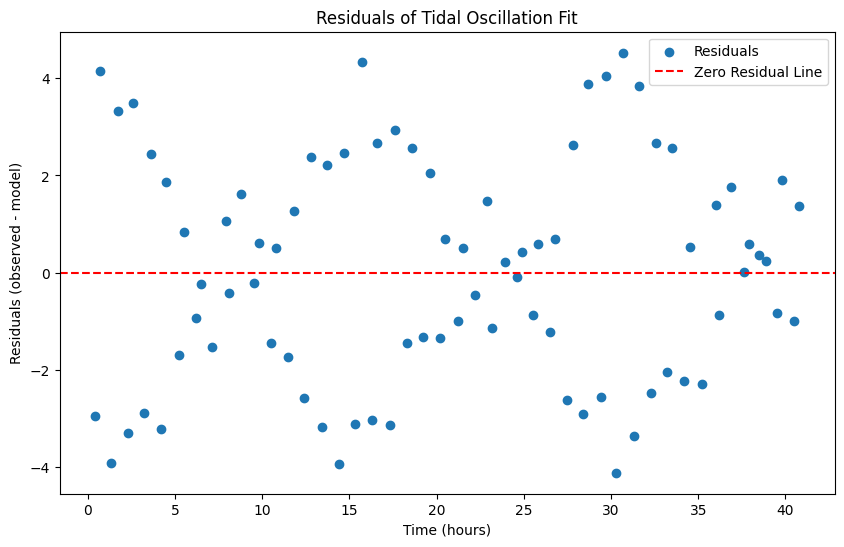

In [5]:
# Calculating residuals
residuals = tide_heights_data - tidal_oscillation(times_data, *fitted_params)

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(times_data, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

plt.xlabel('Time (hours)')
plt.ylabel('Residuals (observed - model)')
plt.title('Residuals of Tidal Oscillation Fit')
plt.legend()

plt.savefig('residuals_plot.pdf')
plt.show()

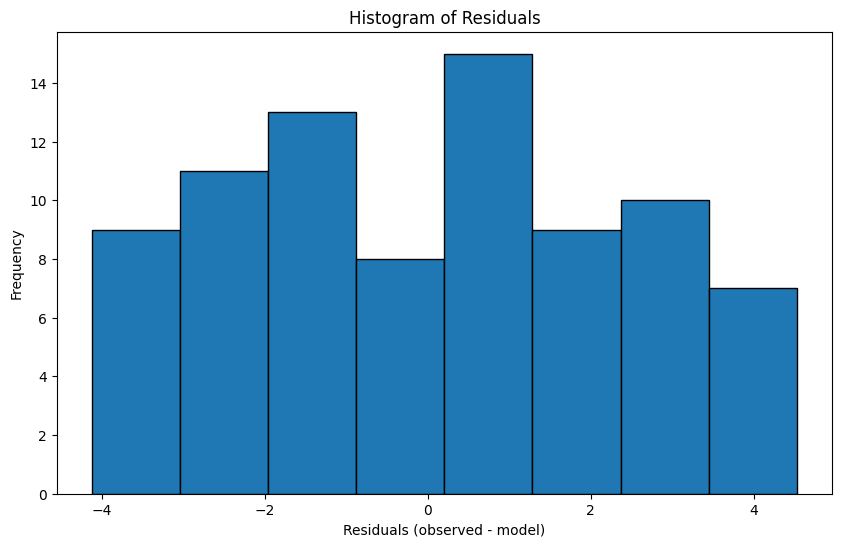

Standard Deviation of Residuals: 2.293946816269651
The scatter in the data is larger than the assumed experimental error.
Estimated Intrinsic Scatter in the Data: 2.2802833148259603


In [6]:
# Plotting histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Residuals (observed - model)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.savefig('residuals_histogram.pdf')
plt.show()

# Calculating and printing standard deviation of residuals
residuals_std = np.std(residuals)
print(f"Standard Deviation of Residuals: {residuals_std}")

# Assessing if scatter is larger than assumed experimental error
if residuals_std > rmse_value:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is within the assumed experimental error.")

# Estimating intrinsic scatter in the data
intrinsic_scatter = np.sqrt(residuals_std**2 - rmse_value**2)
print(f"Estimated Intrinsic Scatter in the Data: {intrinsic_scatter}")

Deviation in Standard Deviations: 0.8718597945755087
Standard Deviation of Residuals with Tsunami Outlier: 2.293946816269651


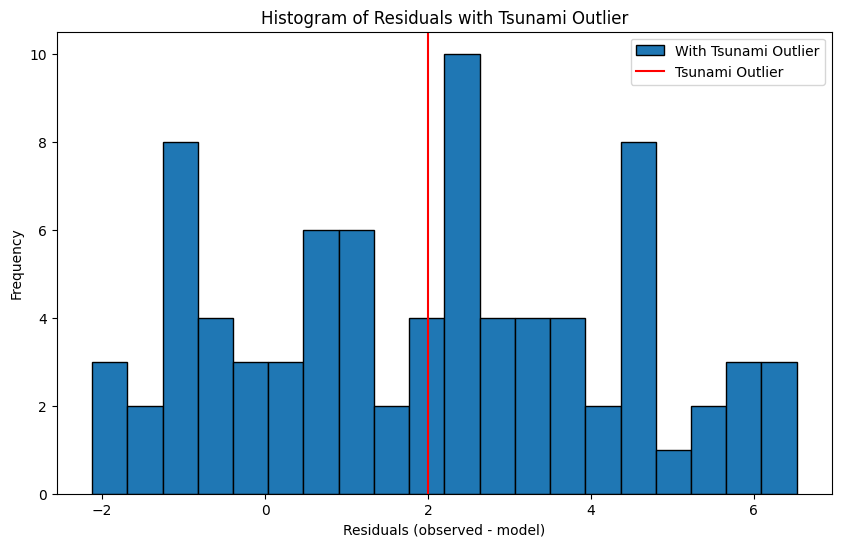

In [11]:
tsunami_deviation = 2  # observed increase in water levels during the tsunami (in feet)
deviation_in_std = tsunami_deviation / residuals_std
print(f"Deviation in Standard Deviations: {deviation_in_std}")

# Add the tsunami outlier
tide_heights_data_with_tsunami = tide_heights_data + tsunami_deviation

# Recalculate residuals with the outlier
residuals_with_tsunami = tide_heights_data_with_tsunami - tidal_oscillation(times_data, *fitted_params)

# Recalculate standard deviation with the outlier
residuals_std_with_tsunami = np.std(residuals_with_tsunami)
print(f"Standard Deviation of Residuals with Tsunami Outlier: {residuals_std_with_tsunami}")

num_bins = 20
plt.figure(figsize=(10, 6))
plt.hist(residuals_with_tsunami, bins=num_bins, edgecolor='black', label='With Tsunami Outlier')
plt.xlabel('Residuals (observed - model)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Outlier')
plt.axvline(tsunami_deviation, color='red', linestyle='-', label='Tsunami Outlier')

plt.legend()
plt.savefig('residuals_histogram_with_tsunami.pdf')
plt.show()
